# Context-FID Score Presentation
## Necessary packages and functions call

- Context-FID score: A useful metric measures how well the the synthetic time series windows ”fit” into the local context of the time series

In [15]:
import os
import torch
import numpy as np
import sys
sys.path.append(os.path.join(os.path.dirname('__file__'), '../'))
from Utils.context_fid import Context_FID
from Utils.metric_utils import display_scores
from Utils.cross_correlation import CrossCorrelLoss

## Data Loading

Load original dataset and preprocess the loaded data.

In [18]:
iterations = 5
ori_data = np.load('../chb_exp/ori_data_1-0.2-diff.npy')
fake_data = np.load('../chb_exp/ddpm_fake_1_eeg-0.2-diff.npy')


## Context-FID Score

- The Frechet Inception distance-like score is based on unsupervised time series embeddings. It is able to score the fit of the fixed length synthetic samples into their context of (often much longer) true time series.

- The lowest scoring models correspond to the best performing models in downstream tasks

In [19]:
context_fid_score = []

for i in range(iterations):
    context_fid = Context_FID(ori_data[:], fake_data[:ori_data.shape[0]])
    context_fid_score.append(context_fid)
    print(f'Iter {i}: ', 'context-fid =', context_fid, '\n')
      
display_scores(context_fid_score)

Iter 0:  context-fid = 0.02872316334127802 
Iter 1:  context-fid = 0.021325208865958803 
Iter 2:  context-fid = 0.019012924737255993 
Iter 3:  context-fid = 0.012730598141764467 
Iter 4:  context-fid = 0.05239804157810014 

Final Score:  0.02683798733287148 ± 0.019110243850653415


## Correlational Score

- The metric uses the absolute error of the auto-correlation estimator by real data and synthetic data as the metric to assess the temporal dependency.

- For d > 1, it uses the l1-norm of the difference between cross correlation matrices.

In [ ]:
def random_choice(size, num_select=100):
    select_idx = np.random.randint(low=0, high=size, size=(num_select,))
    return select_idx

In [ ]:
x_real = torch.from_numpy(ori_data)
x_fake = torch.from_numpy(fake_data)

correlational_score = []
size = int(x_real.shape[0] / iterations)

for i in range(iterations):
    real_idx = random_choice(x_real.shape[0], size)
    fake_idx = random_choice(x_fake.shape[0], size)
    corr = CrossCorrelLoss(x_real[real_idx, :, :], name='CrossCorrelLoss')
    loss = corr.compute(x_fake[fake_idx, :, :])
    correlational_score.append(loss.item())
    print(f'Iter {i}: ', 'cross-correlation =', loss.item(), '\n')

display_scores(correlational_score)

In [ ]:
from Utils.metric_utils import visualization
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"

In [5]:
visualization(ori_data=ori_data, generated_data=fake_data, analysis='tsne', compare=ori_data.shape[0])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1436 samples in 0.000s...


AttributeError: 'NoneType' object has no attribute 'split'

D:\dev-software\anaconda\envs\conda_3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\dev-software\anaconda\envs\conda_3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


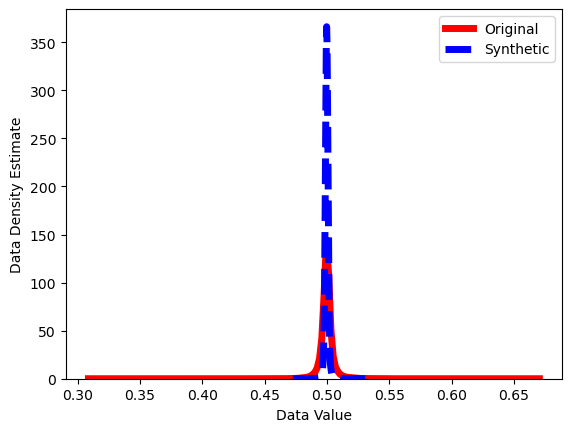

In [7]:
visualization(ori_data=ori_data, generated_data=fake_data, analysis='kernel', compare=ori_data.shape[0])